# Task 5 Advanced Stock Market Prediction


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import datetime

In [2]:
data=pd.read_csv("QMCI.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-12,0.18,0.18,0.17,0.17,0.17,14200
1,2021-07-13,0.17,0.17,0.17,0.17,0.17,31900
2,2021-07-14,0.17,0.17,0.17,0.17,0.17,63800
3,2021-07-15,0.17,0.17,0.17,0.17,0.17,90900
4,2021-07-16,0.17,0.17,0.16,0.16,0.16,20300
...,...,...,...,...,...,...,...
247,2022-07-05,0.20,0.20,0.18,0.18,0.18,5400
248,2022-07-06,0.19,0.20,0.19,0.20,0.20,23200
249,2022-07-07,0.20,0.21,0.20,0.21,0.21,8800
250,2022-07-08,0.19,0.20,0.19,0.20,0.20,39700


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-12,0.18,0.18,0.17,0.17,0.17,14200
1,2021-07-13,0.17,0.17,0.17,0.17,0.17,31900
2,2021-07-14,0.17,0.17,0.17,0.17,0.17,63800
3,2021-07-15,0.17,0.17,0.17,0.17,0.17,90900
4,2021-07-16,0.17,0.17,0.16,0.16,0.16,20300


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-07-05,0.20,0.20,0.18,0.18,0.18,5400
248,2022-07-06,0.19,0.20,0.19,0.20,0.20,23200
249,2022-07-07,0.20,0.21,0.20,0.21,0.21,8800
250,2022-07-08,0.19,0.20,0.19,0.20,0.20,39700
251,2022-07-11,0.20,0.21,0.20,0.20,0.20,36200


In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'FB']
tech_list

['AAPL', 'GOOG', 'TSLA', 'FB']

In [6]:
# Set up End and Start times for data grab (We will analyze for 2 years)
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [7]:
data.columns



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      252 non-null    object 
 1   open      252 non-null    float64
 2   high      252 non-null    float64
 3   low       252 non-null    float64
 4   close     252 non-null    float64
 5   adjclose  252 non-null    float64
 6   volume    252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [11]:
data.describe()

,open,high,low,close,adjclose,volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.190397,0.194960,0.186468,0.190437,0.190437,40625.396825
std,0.030478,0.033631,0.027539,0.030809,0.030809,62288.787575
min,0.150000,0.160000,0.150000,0.150000,0.150000,0.000000
25%,0.170000,0.170000,0.170000,0.170000,0.170000,3600.000000
50%,0.180000,0.190000,0.180000,0.180000,0.180000,15250.000000
75%,0.200000,0.210000,0.190000,0.200000,0.200000,51825.000000
max,0.310000,0.340000,0.290000,0.310000,0.310000,350200.000000


In [12]:
data.reset_index(inplace=True)

In [14]:
#before moving forward let us calculate first the actual 
data_price = round((data['high'] + data['low'] + data['close'])/ 3, 2)
data_price  #actual price

0      0.17
1      0.17
2      0.17
3      0.17
4      0.16
       ... 
247    0.19
248    0.20
249    0.21
250    0.20
251    0.20
Length: 252, dtype: float64

In [15]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'Date': df['Date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

Text(0.5, 0, 'High')

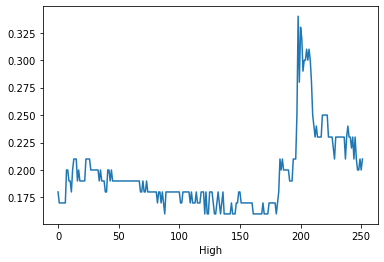

In [16]:
data["high"].plot()
plt.xlabel("High")


Text(0.5, 0, 'High')

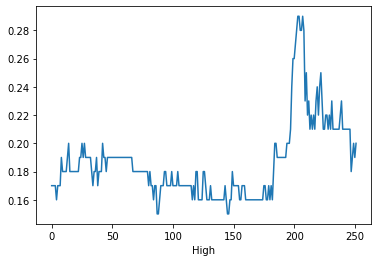

In [17]:
data["low"].plot()
plt.xlabel("High")

Text(0.5, 0, 'open')

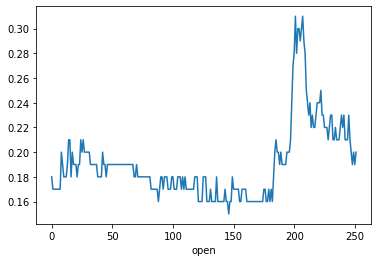

In [18]:
data["open"].plot()
plt.xlabel("open")

Text(0.5, 0, 'open')

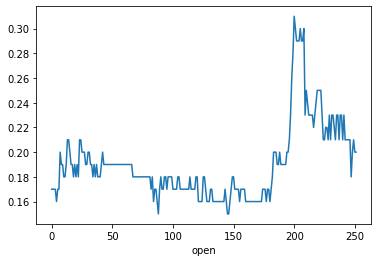

In [19]:
data["close"].plot()
plt.xlabel("open")

Text(0.5, 0, 'open')

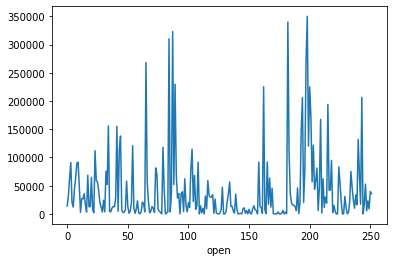

In [20]:
data["volume"].plot()
plt.xlabel("open")

In [25]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data.set_index(['Date'])
data.fillna(method='ffill',inplace=True)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale=scale.fit(data)
data=scale.transform(data)

In [29]:
def sss(w):
    t1,t2=w.shape
    a=[]
    t={}
    for i in range(t2):
        for j in range(t1):
                a.append(w[j][i])
        ss=pd.Series(a)
        t.update({i:ss})
        a=[]
    k=[]
    for i,j in t.items():
        k.append(j)
    ww=pd.concat(k,axis=1)
    n=len(ww.columns)
    for i in range(n):
         ww[n+i]=ww[i].shift(-1)
    return ww

In [30]:
w=sss(data)


In [31]:
w

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.1875,0.111111,0.142857,0.1250,0.1250,0.040548,0.003984,0.1250,0.055556,0.142857,0.1250,0.1250,0.091091
1,0.003984,0.1250,0.055556,0.142857,0.1250,0.1250,0.091091,0.007968,0.1250,0.055556,0.142857,0.1250,0.1250,0.182182
2,0.007968,0.1250,0.055556,0.142857,0.1250,0.1250,0.182182,0.011952,0.1250,0.055556,0.142857,0.1250,0.1250,0.259566
3,0.011952,0.1250,0.055556,0.142857,0.1250,0.1250,0.259566,0.015936,0.1250,0.055556,0.071429,0.0625,0.0625,0.057967
4,0.015936,0.1250,0.055556,0.071429,0.0625,0.0625,0.057967,0.019920,0.1250,0.055556,0.142857,0.1250,0.1250,0.034552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.984064,0.3125,0.222222,0.214286,0.1875,0.1875,0.015420,0.988048,0.2500,0.222222,0.285714,0.3125,0.3125,0.066248
248,0.988048,0.2500,0.222222,0.285714,0.3125,0.3125,0.066248,0.992032,0.3125,0.277778,0.357143,0.3750,0.3750,0.025128
249,0.992032,0.3125,0.277778,0.357143,0.3750,0.3750,0.025128,0.996016,0.2500,0.222222,0.285714,0.3125,0.3125,0.113364
250,0.996016,0.2500,0.222222,0.285714,0.3125,0.3125,0.113364,1.000000,0.3125,0.277778,0.357143,0.3125,0.3125,0.103370


In [33]:
w.fillna(method='ffill',inplace=True)

In [34]:
w.drop([6,7,8,9],axis=1,inplace=True)

In [35]:
w

,0,1,2,3,4,5,10,11,12,13
0,0.000000,0.1875,0.111111,0.142857,0.1250,0.1250,0.142857,0.1250,0.1250,0.091091
1,0.003984,0.1250,0.055556,0.142857,0.1250,0.1250,0.142857,0.1250,0.1250,0.182182
2,0.007968,0.1250,0.055556,0.142857,0.1250,0.1250,0.142857,0.1250,0.1250,0.259566
3,0.011952,0.1250,0.055556,0.142857,0.1250,0.1250,0.071429,0.0625,0.0625,0.057967
4,0.015936,0.1250,0.055556,0.071429,0.0625,0.0625,0.142857,0.1250,0.1250,0.034552
...,...,...,...,...,...,...,...,...,...,...
247,0.984064,0.3125,0.222222,0.214286,0.1875,0.1875,0.285714,0.3125,0.3125,0.066248
248,0.988048,0.2500,0.222222,0.285714,0.3125,0.3125,0.357143,0.3750,0.3750,0.025128
249,0.992032,0.3125,0.277778,0.357143,0.3750,0.3750,0.285714,0.3125,0.3125,0.113364
250,0.996016,0.2500,0.222222,0.285714,0.3125,0.3125,0.357143,0.3125,0.3125,0.103370


In [36]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       252 non-null    float64
 1   1       252 non-null    float64
 2   2       252 non-null    float64
 3   3       252 non-null    float64
 4   4       252 non-null    float64
 5   5       252 non-null    float64
 6   10      252 non-null    float64
 7   11      252 non-null    float64
 8   12      252 non-null    float64
 9   13      252 non-null    float64
dtypes: float64(10)
memory usage: 19.8 KB


In [37]:
www=w.values
xtrain,xtest,ytrain,ytest=www[:3759,0:5],www[3759:,0:5],www[:3759,-1],www[3759:,-1]
xtes=xtest

In [38]:
xtes

array([], shape=(0, 5), dtype=float64)

In [39]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout,SpatialDropout1D
from keras.layers import Bidirectional

In [41]:
model=Sequential()
model.add(Bidirectional(LSTM(100,activation="relu",input_shape=(xtrain.shape[1],xtrain.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [42]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=32,verbose=2)

Epoch 1/50
8/8 - 6s - loss: 0.0437 - 6s/epoch - 733ms/step
Epoch 2/50
8/8 - 0s - loss: 0.0304 - 114ms/epoch - 14ms/step
Epoch 3/50
8/8 - 0s - loss: 0.0316 - 106ms/epoch - 13ms/step
Epoch 4/50
8/8 - 0s - loss: 0.0312 - 97ms/epoch - 12ms/step
Epoch 5/50
8/8 - 0s - loss: 0.0307 - 113ms/epoch - 14ms/step
Epoch 6/50
8/8 - 0s - loss: 0.0308 - 106ms/epoch - 13ms/step
Epoch 7/50
8/8 - 0s - loss: 0.0305 - 107ms/epoch - 13ms/step
Epoch 8/50
8/8 - 0s - loss: 0.0305 - 107ms/epoch - 13ms/step
Epoch 9/50
8/8 - 0s - loss: 0.0305 - 125ms/epoch - 16ms/step
Epoch 10/50
8/8 - 0s - loss: 0.0305 - 93ms/epoch - 12ms/step
Epoch 11/50
8/8 - 0s - loss: 0.0305 - 94ms/epoch - 12ms/step
Epoch 12/50
8/8 - 0s - loss: 0.0305 - 89ms/epoch - 11ms/step
Epoch 13/50
8/8 - 0s - loss: 0.0304 - 107ms/epoch - 13ms/step
Epoch 14/50
8/8 - 0s - loss: 0.0304 - 95ms/epoch - 12ms/step
Epoch 15/50
8/8 - 0s - loss: 0.0304 - 105ms/epoch - 13ms/step
Epoch 16/50
8/8 - 0s - loss: 0.0304 - 104ms/epoch - 13ms/step
Epoch 17/50
8/8 - 0s - l